# GEOG 407 Project Notebook
#### Community Resilience Estimates and Covid-19 

In [134]:
# import required libraries

%matplotlib inline
import os
import pandas as pd
from geopandas import GeoSeries, GeoDataFrame, read_file, gpd
from pandas import Series
from matplotlib import pyplot as plt
import IPython
import numpy as np


In [72]:
file = 'counties.csv'
usa = gpd.read_file(file)

file = 'tl_2020_us_county.shp'
usa_loc = gpd.read_file(file)

file = 'Community_Resilience_Estimate_Large.csv'
cre = gpd.read_file(file)

In [73]:
ill = usa[usa['state'] == "IL"]
ill = ill.rename(columns={"fips":"GEOID"}).drop(columns="geometry")

In [74]:
ill_loc = usa_loc[usa_loc['STATEFP'] == '17']

In [75]:
ill_all = ill.merge(ill_loc, on="GEOID")

In [76]:
ill_all_covid = ill_all.merge(cre.drop(columns="geometry"), on="GEOID")

In [89]:
ill_all_covid = gpd.GeoDataFrame(ill_all_covid, crs=ill_loc.crs)
for col_name in ill_all_covid.columns:
    try:
        a = ill_all_covid[col_name].astype('float64')
        ill_all_covid[col_name] = a
    except:
        pass

In [93]:
ill_all_covid['Aggregate'] = (ill_all_covid["RiskFactor1_percent"] + 
                             ill_all_covid["RiskFactor2_percent"] + 
                             ill_all_covid["RiskFactor3_percent"] + 
                             0.5*ill_all_covid["RiskFactor4a_percent"] + 
                             0.5*ill_all_covid["RiskFactor4b_percent"] + 
                             ill_all_covid["RiskFactor5_percent"] + 
                             ill_all_covid["RiskFactor6_percent"] + 
                             ill_all_covid["RiskFactor7_percent"] + 
                             ill_all_covid["RiskFactor8_percent"]) / 8

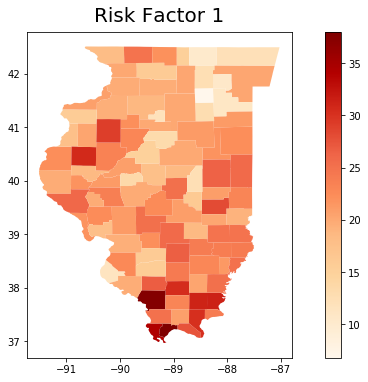

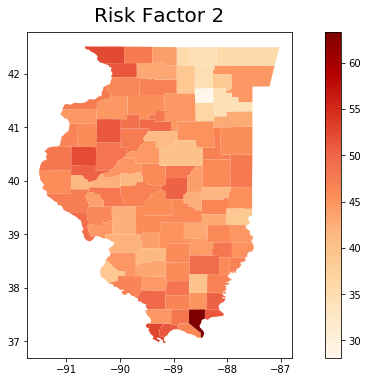

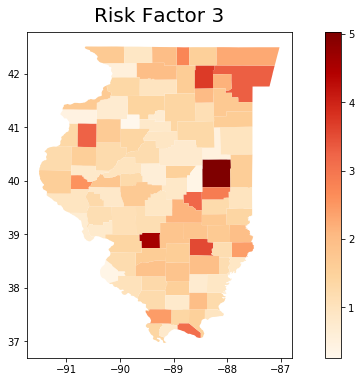

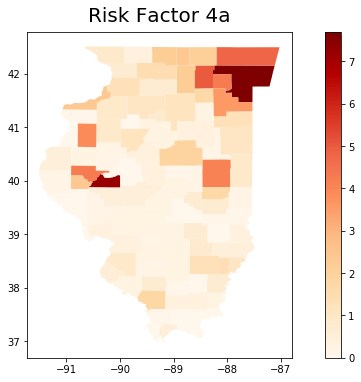

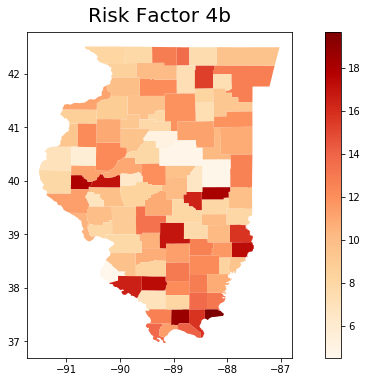

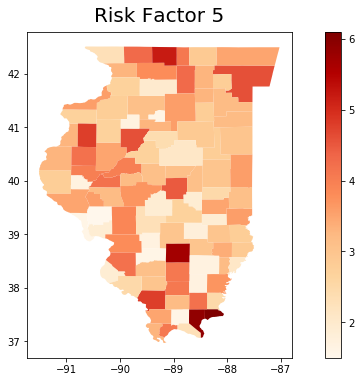

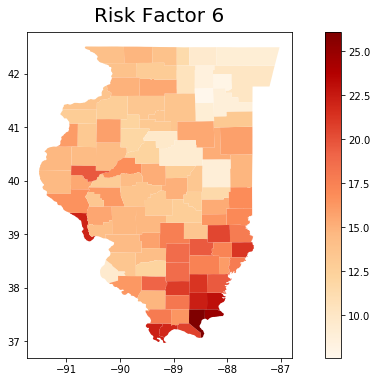

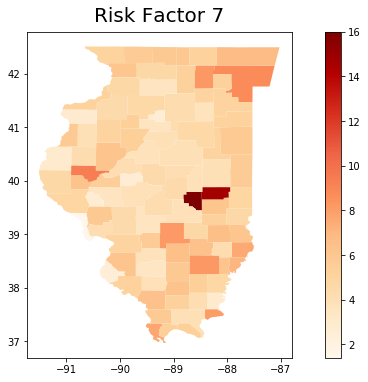

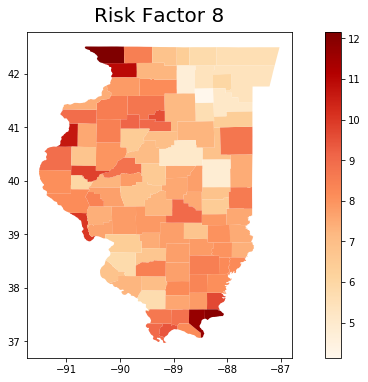

In [136]:
for i in ["1","2","3","4a","4b","5","6","7","8"]:
    fig, ax = plt.subplots(figsize=(12,6))
    ill_all_covid.plot(column="RiskFactor"+i+"_percent", ax=ax,
           cmap='OrRd', legend='true')
    ax.set_title('Risk Factor ' + i, fontsize=20, pad=10);

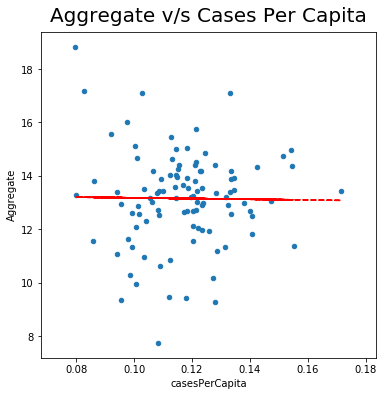

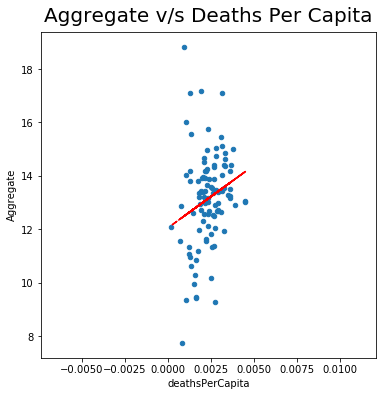

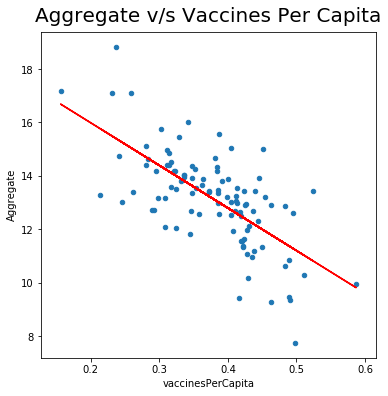

In [140]:
Y = 'Aggregate'
for Y in ['Aggregate']: #, 
#          "RiskFactor1_percent",
#          "RiskFactor2_percent",
#          "RiskFactor3_percent",
#          "RiskFactor4a_percent",
#          "RiskFactor4b_percent",
#          "RiskFactor5_percent",
#          "RiskFactor6_percent",
#          "RiskFactor7_percent",
#          "RiskFactor8_percent"]:
    ill_all_covid['casesPerCapita'] = ill_all_covid['actuals.cases'] / ill_all_covid['population']
    ill_all_covid['deathsPerCapita'] = ill_all_covid['actuals.deaths'] / ill_all_covid['population']
    ill_all_covid['vaccinesPerCapita'] = ill_all_covid['actuals.vaccinationsCompleted'] / ill_all_covid['population']

    X = 'casesPerCapita'
    fig, ax = plt.subplots(figsize=(6,6))
    ill_all_covid[[X, Y]].plot.scatter(x=X, y=Y, ax=ax)
    z = np.polyfit(ill_all_covid[X], ill_all_covid[Y], 1)
    p = np.poly1d(z)
    plt.plot(ill_all_covid[X],p(ill_all_covid[X]),"r--")
    ax.set_title('Aggregate v/s Cases Per Capita', fontsize=20, pad=10);


    X = 'deathsPerCapita'
    fig, ax = plt.subplots(figsize=(6,6))
    ill_all_covid[[X, Y]].plot.scatter(x=X, y=Y, ax=ax)
    z = np.polyfit(ill_all_covid[X], ill_all_covid[Y], 1)
    p = np.poly1d(z)
    plt.plot(ill_all_covid[X],p(ill_all_covid[X]),"r--")
    ax.set_title('Aggregate v/s Deaths Per Capita', fontsize=20, pad=10);


    X = 'vaccinesPerCapita'
    fig, ax = plt.subplots(figsize=(6,6))
    ill_all_covid[[X, Y]].plot.scatter(x=X, y=Y, ax=ax)
    z = np.polyfit(ill_all_covid[X], ill_all_covid[Y], 1)
    p = np.poly1d(z)
    plt.plot(ill_all_covid[X],p(ill_all_covid[X]),"r")
    ax.set_title('Aggregate v/s Vaccines Per Capita', fontsize=20, pad=10);
